# LAB07: Answering Business Question

## Download Dataset

**1. Download dataset from dropbox**

In [1]:
!wget https://www.dropbox.com/s/zc3tdpb7tjj4nt1/dataset-bikesharing.csv

--2020-11-03 13:26:17--  https://www.dropbox.com/s/zc3tdpb7tjj4nt1/dataset-bikesharing.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zc3tdpb7tjj4nt1/dataset-bikesharing.csv [following]
--2020-11-03 13:26:17--  https://www.dropbox.com/s/raw/zc3tdpb7tjj4nt1/dataset-bikesharing.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca3d766f32ab3a35f76d09c89f4.dl.dropboxusercontent.com/cd/0/inline/BCe184UtOG3IxBui72aVwGnGuweeRb-urjPMPZogqDjrNzPWGq7RbQs4GSj4xuFn4nLGN4pmJVg-OITyQexWdroxc3HVTJo2LOK6shWappj_PzeNfTnucI5dMCIMNsBC2xo/file# [following]
--2020-11-03 13:26:17--  https://uca3d766f32ab3a35f76d09c89f4.dl.dropboxusercontent.com/cd/0/inline/BCe184UtOG3IxBui72aVwGnGuweeRb-urjPMPZogqDjrNzPWGq7RbQs4GSj4xuFn4nLGN4pmJVg-OITyQ

**2. Verify downloaded dataset** 

In [2]:
!ls

dataset-bikesharing.csv  sample_data


**3. Count Number of Line**

In [3]:
!wc -l dataset-bikesharing.csv

17380 dataset-bikesharing.csv


**4. View Sample of Data**

In [4]:
!head dataset-bikesharing.csv

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8


## PySpark Preparation

**1. Install PySpark**

In [5]:
%pip install pyspark

     |████████████████████████████████| 204.2MB 66kB/s 
     |████████████████████████████████| 204kB 47.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=fac50387b964fd7193aacd224aa7f4823d36dfe41f1a7c9233c782f1a5182260
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


**2. Create Spark Session**

In [6]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Labs07B').getOrCreate()

In [7]:
print("Spark version : " + spark.version)

Spark version : 3.0.1


In [8]:
import sys
print("Python version : " + sys.version)

Python version : 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


## Read Dataset

**1. Load dataset to dataframe**

In [9]:
file_path = "dataset-bikesharing.csv"

df_bikesharing = spark.read.csv(path=file_path, header = True, inferSchema = True)
df_bikesharing.show(5)


+-------+----------+------+---+----+---+-------+-------+----------+----------+----+------+----+---------+------+----------+---+
|instant|    dteday|season| yr|mnth| hr|holiday|weekday|workingday|weathersit|temp| atemp| hum|windspeed|casual|registered|cnt|
+-------+----------+------+---+----+---+-------+-------+----------+----------+----+------+----+---------+------+----------+---+
|      1|2011-01-01|     1|  0|   1|  0|      0|      6|         0|         1|0.24|0.2879|0.81|      0.0|     3|        13| 16|
|      2|2011-01-01|     1|  0|   1|  1|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|     8|        32| 40|
|      3|2011-01-01|     1|  0|   1|  2|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|     5|        27| 32|
|      4|2011-01-01|     1|  0|   1|  3|      0|      6|         0|         1|0.24|0.2879|0.75|      0.0|     3|        10| 13|
|      5|2011-01-01|     1|  0|   1|  4|      0|      6|         0|         1|0.24|0.2879|0.75|      0.0

**2. View data structure**

In [10]:
df_bikesharing.printSchema()

root
 |-- instant: integer (nullable = true)
 |-- dteday: string (nullable = true)
 |-- season: integer (nullable = true)
 |-- yr: integer (nullable = true)
 |-- mnth: integer (nullable = true)
 |-- hr: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weathersit: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- hum: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- cnt: integer (nullable = true)



**2. Count number of record**

In [11]:
print ('Number of records: %d ' % df_bikesharing.count())

Number of records: 17379 


## Preparation

**1. Change column name**

In [16]:
df2_bikesharing = df_bikesharing.withColumnRenamed("dteday", "date_id" ) \
              .withColumnRenamed("yr", "year_id") \
              .withColumnRenamed("mnth", "month_id") \
              .withColumnRenamed("hr", "hour_id") \
              .withColumnRenamed("casual", "trx_casual") \
              .withColumnRenamed("registered", "trx_registered") \
              .withColumnRenamed("cnt", "trx_total")

df2_bikesharing.printSchema()

root
 |-- instant: integer (nullable = true)
 |-- date_id: string (nullable = true)
 |-- season: integer (nullable = true)
 |-- year_id: integer (nullable = true)
 |-- month_id: integer (nullable = true)
 |-- hour_id: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weathersit: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- hum: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- trx_casual: integer (nullable = true)
 |-- trx_registered: integer (nullable = true)
 |-- trx_total: integer (nullable = true)



## Answer Business Question

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from pyspark.sql.functions import when
from pyspark.sql.functions import to_date, date_format

**1. Average transaction per hour**

In [23]:
df2_bikesharing.createOrReplaceTempView("bikesharing")

In [24]:
spark.sql("\
SELECT * \
FROM bikesharing \
").show(5)

+-------+----------+------+-------+--------+-------+-------+-------+----------+----------+----+------+----+---------+----------+--------------+---------+
|instant|   date_id|season|year_id|month_id|hour_id|holiday|weekday|workingday|weathersit|temp| atemp| hum|windspeed|trx_casual|trx_registered|trx_total|
+-------+----------+------+-------+--------+-------+-------+-------+----------+----------+----+------+----+---------+----------+--------------+---------+
|      1|2011-01-01|     1|      0|       1|      0|      0|      6|         0|         1|0.24|0.2879|0.81|      0.0|         3|            13|       16|
|      2|2011-01-01|     1|      0|       1|      1|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|         8|            32|       40|
|      3|2011-01-01|     1|      0|       1|      2|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|         5|            27|       32|
|      4|2011-01-01|     1|      0|       1|      3|      0|      6|        

In [25]:
spark.sql("\
SELECT hour_id, \
       avg(trx_total) avg_use \
FROM bikesharing \
GROUP BY hour_id \
ORDER BY hour_id \
").show(5)

+-------+------------------+
|hour_id|           avg_use|
+-------+------------------+
|      0| 53.89807162534435|
|      1|  33.3756906077348|
|      2| 22.86993006993007|
|      3|11.727403156384504|
|      4| 6.352941176470588|
+-------+------------------+
only showing top 5 rows



In [22]:
df_agg_hourly = df2_bikesharing.groupBy('hour_id') \
                               .agg({'trx_total' : 'avg'}) \
                               .orderBy('hour_id') \
                               .toDF('hour_id', 'avg_use')
df_agg_hourly.show(5)

+-------+------------------+
|hour_id|           avg_use|
+-------+------------------+
|      0| 53.89807162534435|
|      1|  33.3756906077348|
|      2| 22.86993006993007|
|      3|11.727403156384504|
|      4| 6.352941176470588|
+-------+------------------+
only showing top 5 rows



In [26]:
pd_agg_hourly = df_agg_hourly.toPandas()
pd_agg_hourly.head()

,hour_id,avg_use
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


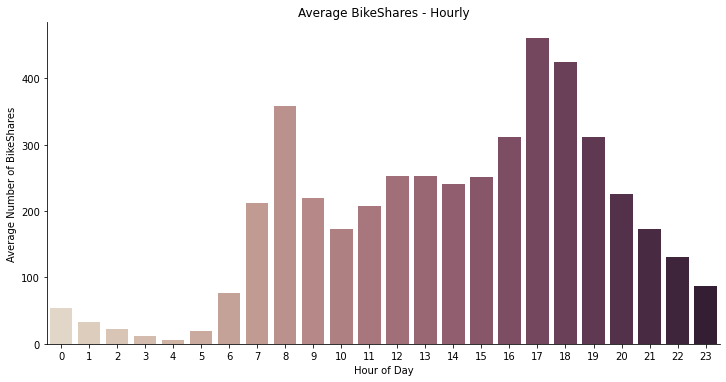

In [30]:
sns.catplot(data=pd_agg_hourly, x="hour_id", y="avg_use", \
            kind="bar", \
            palette="ch:.25", \
            height=5, \
            aspect=2 \
            ) \
            .set( \
                 xlabel= 'Hour of Day', \
                 ylabel= 'Average Number of BikeShares', \
                 title = 'Average BikeShares - Hourly')

**2. Average transaction per day**

In [31]:
df2_bikesharing.show(5)

+-------+----------+------+-------+--------+-------+-------+-------+----------+----------+----+------+----+---------+----------+--------------+---------+
|instant|   date_id|season|year_id|month_id|hour_id|holiday|weekday|workingday|weathersit|temp| atemp| hum|windspeed|trx_casual|trx_registered|trx_total|
+-------+----------+------+-------+--------+-------+-------+-------+----------+----------+----+------+----+---------+----------+--------------+---------+
|      1|2011-01-01|     1|      0|       1|      0|      0|      6|         0|         1|0.24|0.2879|0.81|      0.0|         3|            13|       16|
|      2|2011-01-01|     1|      0|       1|      1|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|         8|            32|       40|
|      3|2011-01-01|     1|      0|       1|      2|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|         5|            27|       32|
|      4|2011-01-01|     1|      0|       1|      3|      0|      6|        

In [32]:
from pyspark.sql.functions import to_date, date_format

pd_agg_daily = df2_bikesharing.select("date_id", "weekday", "trx_total") \
          .withColumn('day_name', date_format(df2_bikesharing.date_id, 'E')) \
          .groupBy("weekday", "day_name") \
          .agg({ '*' : 'count', 'trx_total' : 'avg'}) \
          .orderBy("weekday") \
          .toDF('weekday', 'day_name', 'avg_transaction', 'num_record') \
          .select('day_name', 'avg_transaction') \
          .toPandas()

pd_agg_daily.head(7)

,day_name,avg_transaction
0,Sun,177.468825
1,Mon,183.744655
2,Tue,191.238891
3,Wed,191.130505
4,Thu,196.436665
5,Fri,196.135907
6,Sat,190.209793


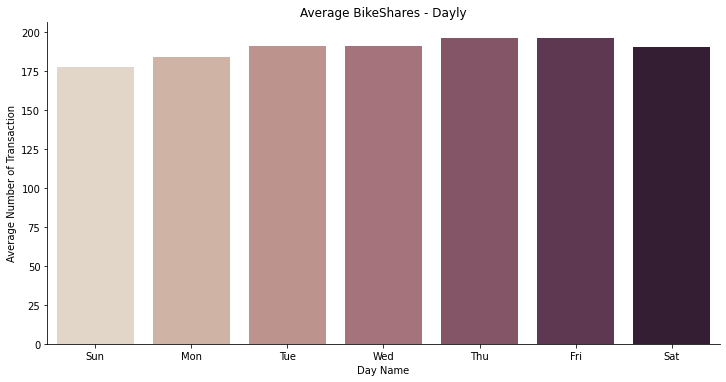

In [34]:
sns.catplot(data=pd_agg_daily, x="day_name", y="avg_transaction", 
            kind="bar",             # Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
            palette="ch:.25",  
            height=5,              # Make the plot 10 units high
            aspect=2
            ) \
            .set( \
                 xlabel= 'Day Name', \
                 ylabel= 'Average Number of Transaction', \
                 title = 'Average BikeShares - Dayly')

**3. Workingday average usage**

In [35]:
from pyspark.sql.functions import when

df_stg_dataset = df2_bikesharing.select("workingday", "trx_total") \
          .groupBy("workingday") \
          .agg({ '*' : 'count', 'trx_total' : 'avg' }) \
          .toDF("workingday", "avg_transaction", "num_rec")

pd_avg_shares_workingday = df_stg_dataset.withColumn("day_type", when(df_stg_dataset.workingday == 1, "weekday").otherwise("weekend") ) \
          .select('day_type', 'avg_transaction') \
          .toPandas()

pd_avg_shares_workingday.head()

,day_type,avg_transaction
0,weekday,193.207754
1,weekend,181.405332


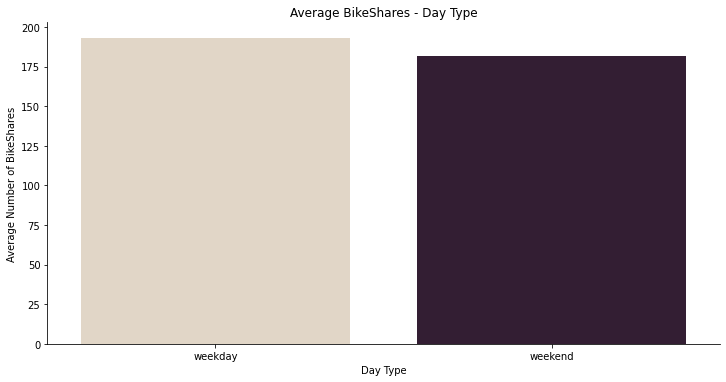

In [36]:
sns.catplot(data=pd_avg_shares_workingday, x="day_type", y="avg_transaction", 
            kind="bar",             # Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
            palette="ch:.25",  
            height=5,              # Make the plot 10 units high
            aspect=2
            ) \
            .set( \
                 xlabel= 'Day Type', \
                 ylabel= 'Average Number of BikeShares', \
                 title = 'Average BikeShares - Day Type')

**4. Holiday average usage**

In [38]:
pd_avg_shares_holiday = df2_bikesharing.select('holiday', 'trx_total') \
          .withColumn('is_holiday', when(df2_bikesharing.holiday == 1, 'holiday').otherwise('non holiday')) \
          .groupBy('is_holiday') \
          .agg({ 'trx_total' : 'avg'  }) \
          .toDF('is_holiday', 'avg_transaction') \
          .toPandas()

pd_avg_shares_holiday.head()

,is_holiday,avg_transaction
0,holiday,156.87000
1,non holiday,190.42858


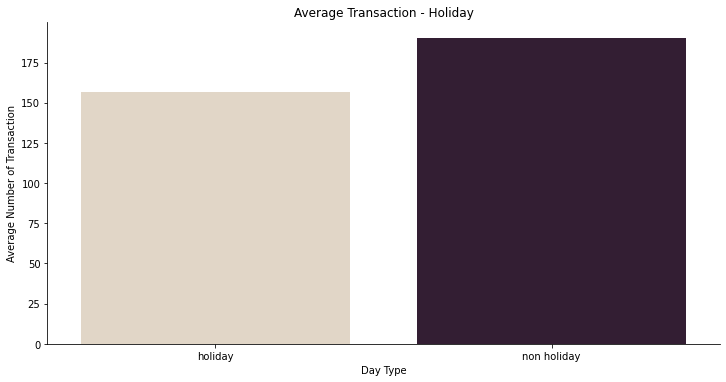

In [39]:
sns.catplot(data=pd_avg_shares_holiday, x="is_holiday", y="avg_transaction", 
            kind="bar",             # Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
            palette="ch:.25",  
            height=5,              # Make the plot 10 units high
            aspect=2
            ) \
            .set( \
                 xlabel= 'Day Type', \
                 ylabel= 'Average Number of Transaction', \
                 title = 'Average Transaction - Holiday')

**5. Average usage per season**

In [40]:
pd_avg_shares_season = df2_bikesharing.select('season', 'trx_total') \
          .withColumn('season_name', when(df2_bikesharing.season == 1, 'winter')
                                     .when(df2_bikesharing.season == 2, 'spring')
                                     .when(df2_bikesharing.season == 3, 'summer')
                                     .otherwise('fall') ) \
          .groupBy('season', 'season_name') \
          .agg({ 'trx_total' : 'avg'}) \
          .orderBy('season') \
          .toDF('season', 'season_name', 'avg_transaction') \
          .select('season_name', 'avg_transaction') \
          .toPandas()

pd_avg_shares_season.head()

,season_name,avg_transaction
0,winter,111.114569
1,spring,208.344069
2,summer,236.016237
3,fall,198.868856


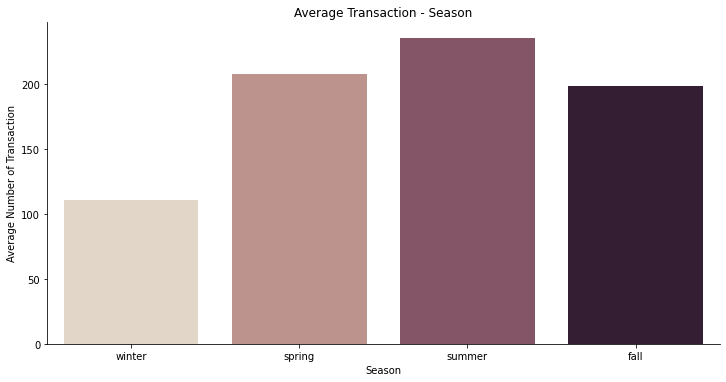

In [41]:
sns.catplot(data=pd_avg_shares_season, x="season_name", y="avg_transaction", 
            kind="bar",             # Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
            palette="ch:.25",  
            height=5,              # Make the plot 10 units high
            aspect=2
            ) \
            .set( \
                 xlabel= 'Season', \
                 ylabel= 'Average Number of Transaction', \
                 title = 'Average Transaction - Season')

**6. Daily usage**

In [49]:
from pyspark.sql.functions import col, unix_timestamp, to_date

In [57]:
pd_avg_shares_daily = df2_bikesharing.withColumn('date_trx', 
                                                 to_date(unix_timestamp(df2_bikesharing.date_id, 'yyyy-MM-dd').cast("timestamp"))) \
                                     .select('date_trx' , 'trx_total' ) \
                                     .groupBy('date_trx') \
                                     .agg({ 'trx_total' : 'sum' }) \
                                     .orderBy('date_trx') \
                                     .toDF('date_trx', 'total_transaction') \
                                     .toPandas()

pd_avg_shares_daily

,date_trx,total_transaction
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


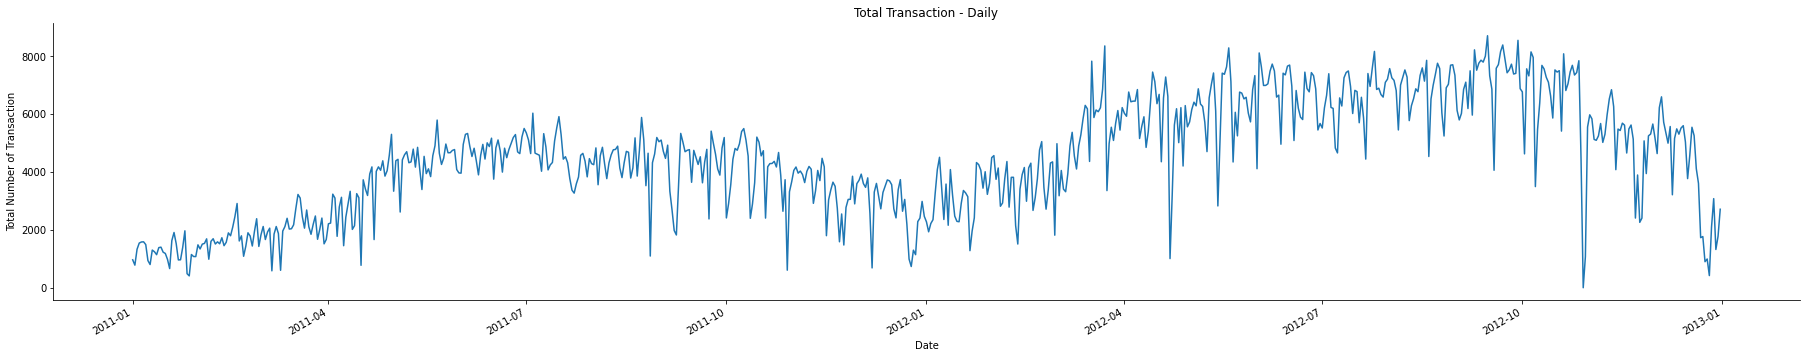

In [63]:
## it takes long time
g = sns.relplot(data=pd_avg_shares_daily, x="date_trx", y="total_transaction", 
            kind="line", 
            palette="ch:.25",  
            height=5,
            aspect=5,
            )
g.set( \
      xlabel= 'Date', \
      ylabel= 'Total Number of Transaction', \
      title = 'Total Transaction - Daily', \
      )
g.fig.autofmt_xdate()

**7. Monthly usage**

In [65]:
pg_agg_shares_monthly = df2_bikesharing.groupBy('month_id') \
          .agg({ 'trx_total' : 'sum' }) \
          .orderBy('month_id') \
          .toDF('month', 'total_transaction') \
          .toPandas()

pg_agg_shares_monthly

,month,total_transaction
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


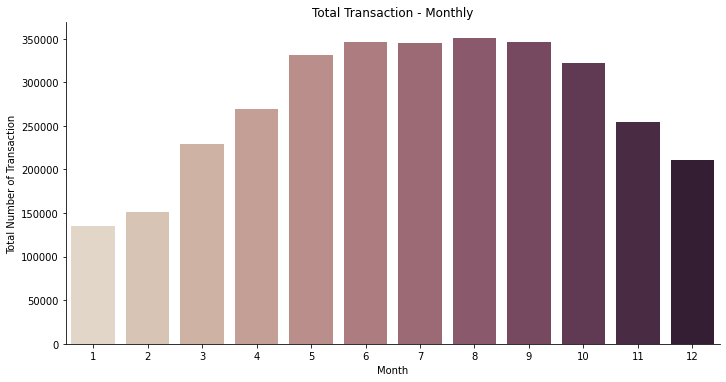

In [66]:
sns.catplot(data=pg_agg_shares_monthly, x="month", y="total_transaction", 
            kind="bar",             # Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
            palette="ch:.25",  
            height=5,              # Make the plot 10 units high
            aspect=2
            ) \
            .set( \
                 xlabel= 'Month', \
                 ylabel= 'Total Number of Transaction', \
                 title = 'Total Transaction - Monthly')

**8. Average usage per weather condition**

In [67]:
df2_bikesharing.show(5)

+-------+----------+------+-------+--------+-------+-------+-------+----------+----------+----+------+----+---------+----------+--------------+---------+
|instant|   date_id|season|year_id|month_id|hour_id|holiday|weekday|workingday|weathersit|temp| atemp| hum|windspeed|trx_casual|trx_registered|trx_total|
+-------+----------+------+-------+--------+-------+-------+-------+----------+----------+----+------+----+---------+----------+--------------+---------+
|      1|2011-01-01|     1|      0|       1|      0|      0|      6|         0|         1|0.24|0.2879|0.81|      0.0|         3|            13|       16|
|      2|2011-01-01|     1|      0|       1|      1|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|         8|            32|       40|
|      3|2011-01-01|     1|      0|       1|      2|      0|      6|         0|         1|0.22|0.2727| 0.8|      0.0|         5|            27|       32|
|      4|2011-01-01|     1|      0|       1|      3|      0|      6|        

In [68]:
pd_agg_shares_weather = df2_bikesharing.groupBy('weathersit') \
          .agg({ 'trx_total' : 'avg' }) \
          .orderBy('weathersit') \
          .toDF('weathersit', 'avg_transaction') \
          .toPandas()

pd_agg_shares_weather

,weathersit,avg_transaction
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


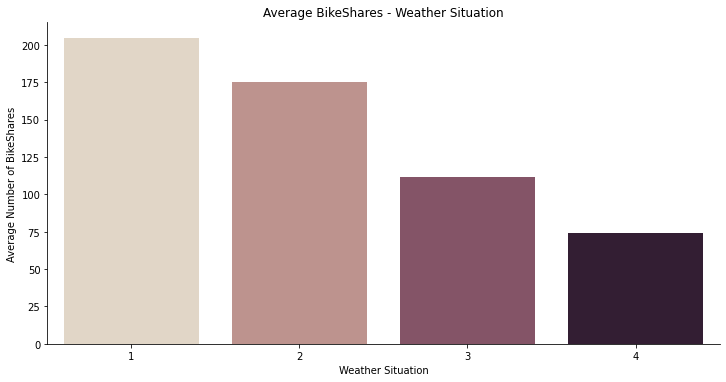

In [69]:
g = sns.catplot(data=pd_agg_shares_weather, x="weathersit", y="avg_transaction", 
            kind="bar",  
            palette="ch:.25",  
            height=5,  
            aspect=2,
            )
g.set( \
      xlabel= 'Weather Situation', \
      ylabel= 'Average Number of BikeShares', \
      title = 'Average BikeShares - Weather Situation', \
      )

**9. Usage relation between day and hour**

In [71]:
pd_day_vs_hour_mean = df2_bikesharing.groupBy("weekday").pivot("hour_id").sum("trx_total").orderBy('weekday').toPandas()
pd_day_vs_hour_mean

,weekday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,9775,8053,6286,3239,955,852,1493,3476,8805,16437,27151,33115,39161,39368,38181,37163,37317,33471,28626,23675,17643,13403,9883,6499
1,1,3571,1800,1021,496,567,2252,8930,25848,42868,22718,14459,17024,21581,21384,20041,21046,29583,52249,50060,35836,25176,18152,12039,6802
2,2,2790,1254,687,382,508,2470,10863,30569,48122,24118,13181,14924,18826,19031,17510,19438,29817,56605,53827,36808,26332,19368,13757,7922
3,3,3594,1595,797,484,477,2678,11212,31614,50786,24807,13717,15829,20166,19326,17737,18854,28388,53367,50885,36823,26436,20051,14800,8625
4,4,4045,1774,934,497,528,2669,11066,31388,50323,24810,13654,16360,20550,20233,18289,20237,29775,54844,52218,37279,27967,20580,15313,10062
5,5,5453,2571,1325,673,589,2486,9363,26450,48077,26935,16404,19564,24715,25113,23854,26256,34423,51211,43783,31415,22186,17667,15295,11982
6,6,9902,7117,5302,2403,804,854,2205,4826,12020,19613,27691,34504,39415,40464,40040,40155,38445,35113,30373,24953,18810,16224,14525,12049


Text(0.5, 1.0, 'Bikeshares by weekday and day hours')

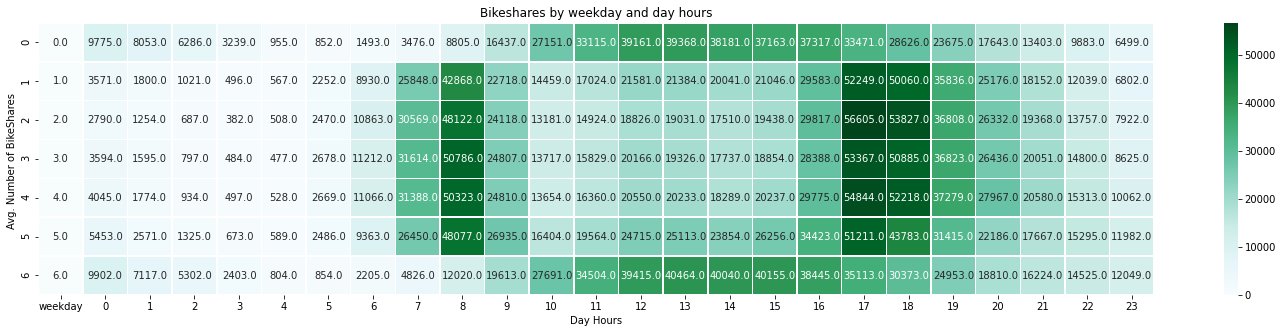

In [72]:
plt.figure(figsize=(25,5))
g = sns.heatmap(data=pd_day_vs_hour_mean, cmap="BuGn", annot=True, linewidths=.5, fmt=".1f" )
plt.xlabel("Day Hours")
plt.ylabel("Avg. Number of BikeShares ")
#plt.xticks(rotation=90,ha='right')
plt.title("Bikeshares by weekday and day hours")